# Sarah Li-Wong

## Research question/interests
I am interested in analyzing the data to learn the commonalities of the most listened to tracks based on geographic location.

## Task 1 Exploratory Data Analysis (EDA)

In [17]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

## Raw Data

Loaded the raw dataset

In [18]:
tracks = pd.read_csv("../data/raw/tracks.csv", low_memory=False)

Preview and statistics of the raw dataset that I will be using.

In [19]:
tracks
tracks.info()
tracks.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106576 entries, 0 to 106575
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  106575 non-null  object
 1   album       106575 non-null  object
 2   album.1     103046 non-null  object
 3   album.2     70295 non-null   object
 4   album.3     15296 non-null   object
 5   album.4     106575 non-null  object
 6   album.5     106575 non-null  object
 7   album.6     83150 non-null   object
 8   album.7     106575 non-null  object
 9   album.8     18061 non-null   object
 10  album.9     106575 non-null  object
 11  album.10    105550 non-null  object
 12  album.11    106575 non-null  object
 13  album.12    100067 non-null  object
 14  artist      22712 non-null   object
 15  artist.1    5376 non-null    object
 16  artist.2    14272 non-null   object
 17  artist.3    71157 non-null   object
 18  artist.4    106575 non-null  object
 19  artist.5    105719 non-

,Unnamed: 0,album,album.1,album.2,album.3,album.4,album.5,album.6,album.7,album.8,...,track.10,track.11,track.12,track.13,track.14,track.15,track.16,track.17,track.18,track.19
0,NaN,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
1,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World


These are the top five rows of the tracks dataset. The output shows that we have 106576 entries with 53 columns. The column name data is divided between the header row and row 0. Row 1 and on shows the numeric data.

In [20]:
# This command prints each column's header row and sub-categories at row 0.
tracks.iloc[0]

Unnamed: 0                  NaN
album                  comments
album.1            date_created
album.2           date_released
album.3                engineer
album.4               favorites
album.5                      id
album.6             information
album.7                 listens
album.8                producer
album.9                    tags
album.10                  title
album.11                 tracks
album.12                   type
artist        active_year_begin
artist.1        active_year_end
artist.2      associated_labels
artist.3                    bio
artist.4               comments
artist.5           date_created
artist.6              favorites
artist.7                     id
artist.8               latitude
artist.9               location
artist.10             longitude
artist.11               members
artist.12                  name
artist.13      related_projects
artist.14                  tags
artist.15               website
artist.16        wikipedia_page
set     

The code below allows us to check for missing values in the dataframe. We will drop rows with missing values.

In [25]:
# Generate preview of entries with null values
if tracks.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(tracks[tracks.isnull().any(axis=1)].head(3))
    tracks.dropna(axis=0, how='any')
    plt.show()


Preview of data with null values:
xxxxxxxxxxxxx
  Unnamed: 0     album              album.1              album.2   album.3  \
0        NaN  comments         date_created        date_released  engineer   
1   track_id       NaN                  NaN                  NaN       NaN   
2          2         0  2008-11-26 01:44:45  2009-01-05 00:00:00       NaN   

     album.4 album.5      album.6  album.7   album.8  ...     track.10  \
0  favorites      id  information  listens  producer  ...  information   
1        NaN     NaN          NaN      NaN       NaN  ...          NaN   
2          4       1      <p></p>     6073       NaN  ...          NaN   

   track.11       track.12                                           track.13  \
0  interest  language_code                                            license   
1       NaN            NaN                                                NaN   
2      4656             en  Attribution-NonCommercial-ShareAlike 3.0 Inter...   

  track.14  trac

The code below allows us to check for duplicated entries, which we will drop if presented.

In [35]:
# Generate count statistics of duplicate entries
if len(tracks[tracks.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(tracks[tracks.duplicated(keep=False)].sort_values(by=list(tracks.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


For easier understanding, we will manually rename some columns.

In [37]:
tracks_subcat = tracks[['Unnamed: 0', 'track.7', 'artist.12', 'artist.9']].rename(columns={'Unnamed: 0': 'Track ID', 'track.7': 'Genre', 'artist.12': 'Artist Name', 'artist.9': 'Location'})
tracks_subcat

,Track ID,Genre,Artist Name,Location
0,NaN,genre_top,name,location
1,track_id,NaN,NaN,NaN
2,2,Hip-Hop,AWOL,New Jersey
3,3,Hip-Hop,AWOL,New Jersey
4,5,Hip-Hop,AWOL,New Jersey
...,...,...,...,...
106571,155316,Rock,Spowder,New Jersey
106572,155317,Rock,Spowder,New Jersey
106573,155318,Rock,Spowder,New Jersey
106574,155319,Rock,Spowder,New Jersey


Now that we have Genre, Artist Name, and Location, we can graph them individually.

<AxesSubplot:>

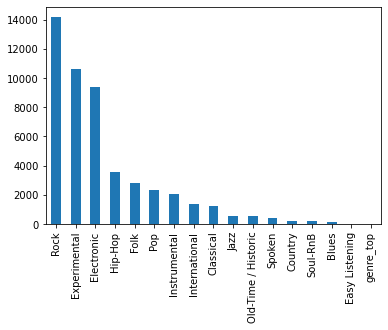

In [36]:
# Histogram for Genres in dataframe
plt.figure()
genre_sizes = tracks_subcat.iloc[:, 1].value_counts()
genre_sizes.plot(kind='bar')

The number of tracks in each genre in the dataframe is represented by this histogram.